In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression

warnings.filterwarnings('ignore')

class PandasHandler:
    """
    Handler for basic operations on dataframe pandas
    visualization, nan inspection and repair
    LOADING OF Dataframe
    load_csv(file_path, parse_dates=True):
    def get_df(self, columns=''):
    def get_train_test_df(self, target='', features='', split_percentage=0.2):
    def split_df(self, test_size=0.2, target_col):
    
    # Investigation
    def get_col_with_nan(self):
    def display_col_with_nan(self):
    def count_categories(self):
    def get_numeric_cols(self):
    def get_text_cols(self):    
    def get_categoric_cols(self):
    def get_percStdDev_data(self, colname, limit_percStdDev=1):
    def get_outliers(self, col):
    def get_iqr_outliers(self, col):
    def get_sigma_outliers(self, col):
    def get_density_outliers(self, selected_columns=None, epsilon=1.5, min_samples=5, metric='euclidean'):
    def get_df_variety(self, X=None, only_categorical=False):

    # Repair
    def repair_nan(self, colname=None, mode='value', value=0):
    def drop_row_with_nan_val(self, threshold=1,axis=0,inplace=True):
    def drop_col(self,colnames):
    def categories_threshold(self, threshold=5, under_threshold=True):
    def factorize_categories(self, columns=None):
    def remove_outliers(self, col, method='sigma', epsilon=1.5, min_samples=5, metric='euclidean'):
    def reduce_cat(self, col, values):

    # Add utility cols
    def standard_scaling(self, col1, col2):
    def normalize_scaling(self, col1, col2):
    def add_max_scaled_col(self,colname, group_by = '', prefix='max_scaled_'):
    def add_normalized_col(self,colname, prefix='normalized_'):
    def add_standard_col(self,colname, prefix='standard_'):
    def mean(self, colname, group_by='', addCol=False):
    def max(self, colname, group_by='', addCol=False):
    def min(self, colname, group_by='', addCol=False):
    def label_encode(self,columns=None):
    def onehot_encode(self, columns=None):

    # Visualization
    def plot_line(self, y='', x=''):
    def plot_distribution_line(self, col):
    def distribution(self, cols, num_subplots_perrow=3):
    def scatter(self, colx, coly, num_subplots_perrow=3, limit_percStdDev=1):
    def correlations(self, annotation=True, limit=0):
    def correlations(self, df=None, annotation=True, limit=0):
    def boxplot_outliers(self, col):
    def pairplot_relations(self):
    def features_importance(self, X=None, y=None, n_features_to_vis=25):

    
    """
        
    def __init__(self, data=None):
        self.df = None
        if data is not None:
            self.df = pd.DataFrame(data)
            self.cols_containing_NaN = self._get_columns_with_nan()
    
        self.features = None
        self.target = None
        self.X = self.df
        self.y = None
    
    def _get_columns_with_nan(self):
        return self.df.columns[self.df.isna().any()].tolist()

    def get_X(self):
        return self.X
        
    def get_y(self):
        return self.y
        
    def set_features(self, features):
        self.features = features
        return
        
    def set_target(self, target):
        self.target = target
        self.features.pop(self.features.index(target))
        self.X = self.df
        self.y = self.X.pop(target)
        return

    def get_df_variety(self, X=None, only_categorical=False):
        """Gets the count of group by field of every field of the ds"""
        if X is None:
            X = self.df
        
        row_count = X.shape[0]
        print(f'Total rows: {row_count}')
        
        for col in X.columns:
            if X[col].dtype == 'object' or X[col].dtype == 'category':
                counts = X.groupby(col)[col].count()
                percentages = (counts / counts.sum()) * 100
                
                counts = counts.apply(np.floor).astype(int)
                percentages = percentages.apply(np.floor).astype(int)
    
                print(f'\nColonna: {col}')
                print(f'{"Nome Campo":<15} {"Conteggi":<10} {"Percentuale":<12}')
                for name, count, percent in zip(counts.index, counts, percentages):
                    print(f'{name:<15} {count:<10} {percent:<12}')        
            else:
                print(f'{"Nome Campo":<15} {"Conteggi":<10} {"Percentuale":<12}')
                counts = X[col].notnull().count()
                percent = counts/row_count
                print(f'{col:<15} {counts:<10} {percent:<12}')        
                
                    
        return

    def reduce_cat(self, X=None,  dictionary=None):
        """Assigns Other if the value in col is not in values"""
        if X is None:
            X = self.df
        other_val = 'Other'
        for col, values in dictionary.items():
            if col in X.columns: 
                X[col] = X[col].apply(lambda x: x if x in values else other_val)
        
        return
        
    
    def print_numbercols_notzero(self, X=None):
        """Prints all numeric cols with their count>0"""        

        if X is None:
            X = self.df
        cols = X.select_dtypes(include=['number'])

        for col in cols:
            print(f'Counts for {col}--> {X[X[col]>0][col].count()}')


    
    def isolate_features(self, X=None, features=None, target=None):
        """Isolates the features of a dataframe"""        

        if X is None:
            X = self.df
        
        if features is None:
            features = X.columns.tolist()  # Converti in lista se None
        
        if isinstance(features, str):
            features = [features]  # Trasforma in lista se è una stringa
        
        # Controllo se tutte le caratteristiche specificate esistono in X
        missing_features = [feature for feature in features if feature not in X.columns]
        if missing_features:
            raise ValueError(f"Le seguenti colonne non esistono nel DataFrame: {missing_features}")
        
        if target is not None:
            self.set_target(target)
            # Estrai il target e rimuovilo da X
            if target in X.columns:
                self.y = X.pop(target)
            else:
                raise ValueError(f"La colonna target '{target}' non esiste nel DataFrame.")
        
        self.set_features(features)
        
        # Isola solo le colonne specificate e modifica direttamente X
        for column in X.columns:
            if column not in features:
                del X[column]  # Rimuovi le colonne non specificate
        
        self.X = X  # Aggiorna self.X con il DataFrame modificato

    
    
    def get_df(self, columns=''):
        """Gets the dataframe"""
        if not columns:
            return self.df
        else:
            return self.df[columns]

    def split_df(self , target_col, test_size=0.2):
        """Splits the df in X and y for test and train"""
        X = self.df.copy()
        y = X.pop(target_col)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state=42)        
        return X_train, y_train, X_test, y_test
    

    def get_train_test_df(self, target=None, features=None, split_percentage=0.2):
        """Gets the pairs X, y for training and test"""
        if target is not None and target not in self.df.columns:
            raise ValueError(f"Target '{target}' not found in DataFrame.")
        
        train_df, test_df = train_test_split(
            self.df, 
            test_size=split_percentage, 
            random_state=42, 
        )        
        
        if target is not None:
            y_train = train_df.pop(target)
            y_test = test_df.pop(target)
        else:
            y_train = []  # o pd.Series(dtype='float')
            y_test = []   # o pd.Series(dtype='float')

        if features is None:
            features = self.df.columns.drop(target) if target else self.df.columns
            
        X_train = train_df[features]
        X_test = test_df[features]

        return X_train, y_train, X_test, y_test
        
    
    def get_col_with_nan(self, X=None):
        """Gets all column names with nan and lists them with counting"""
        if X is None:
            X = self.get_df()
            print(self._get_columns_with_nan())
            
        nan_columns = {}
        total = X.shape[0]
        
        for column in X.columns:
            nan_count = X[column].isnull().sum()
            if nan_count > 0:
                percentage = '{:.2f}'.format(nan_count*100 / total)
                nan_columns[column] = f'{nan_count} count, {percentage}% of total'
        
        return nan_columns
        
    def repair_nan(self, X=None, colname=None, mode='value', value=0):
        """
        Repair df where nan is found in columns 
        MODES: value, delrow, mostcommon, mean, min, max, random_number
        """
        if X is None:
            X = self.get_df()
        
        if colname is None:
            colname = X.columns.tolist()

        if isinstance(colname, str):
            colname = [colname]

        for col in colname:
            if col not in X.columns:
                print(f"{col} not found DataFrame.")
                continue

            if mode == 'value':
                X[col].fillna(value, inplace=True)
            elif mode == 'delrow':
                X.dropna(subset=[col], inplace=True)
            elif mode == 'mostcommon':
                most_common = X[col].mode()[0] 
                X[col].fillna(most_common, inplace=True)
            elif mode == 'mean':
                mean_value = X[col].mean()
                X[col].fillna(mean_value, inplace=True)
            elif mode == 'min':
                min_value = X[col].min()
                X[col].fillna(min_value, inplace=True)
            elif mode == 'max':
                max_value = X[col].max()
                X[col].fillna(max_value, inplace=True)
            elif mode == 'random_number':
                mean_value = X[col].mean()
                std_dev = X[col].std()  
                def is_nan(x):
                    return pd.isna(x)
                
                def random_error(x):
                    if is_nan(x):
                        return random.gauss(mean_value, 2 * std_dev) 
                    return x
            
                X[col] = X[col].apply(random_error)            
            else:
                print(f'{mode} not found')

        return

    def get_numeric_cols(self):
        """Gets all numeric column names in a list"""
        return self.df.select_dtypes(include=['number']).columns.tolist()

    def get_text_cols(self):
        """Gets all text column names in a list"""
        return self.df.select_dtypes(include=['object']).columns.tolist()
    
    def get_categoric_cols(self):
        """Gets all categoric column names in a list"""
        return self.df.select_dtypes(include=['category']).columns.tolist()
    
    def display_col_with_nan(self):
        """Displays total of nan counts, the columns containing nan"""
        nan_count = self.df.isnull().sum()
        print('total NaN:' + str(nan_count.sum()))
        print(f'Fields containing NaN:    {nan_count[nan_count>0].sort_values(ascending=False)}')
        return self.cols_containing_NaN
    
    def drop_row_with_nan_val(self, threshold=1,axis=0,inplace=True):
        """Drops rows having a nan count over the cols over a certain threshold. Ex:threshold=1
        mantains only rows containing 1 nan"""
        self.df.dropna(threshold=threshold,axis=axis,inplace=inplace)
        return

    def drop_col(self, X=None, colnames=None):
        """Drops columns"""
        if X is None:
            X = self.df
            
        for column in colnames:
            if column in X.columns:
                X.drop(columns=column, inplace=True)
            else:
                print(f"{column} not in DataFrame.")     


        return

    
    def add_max_scaled_col(self,colname, group_by = '', prefix='max_scaled_'):
        """Add max scaled col --> -1 to 1 over a grouping (or not)"""
        new_name = prefix + colname
        if len(group_by)==0:
            self.df[new_name] = self.df[colname]  / self.df[colname].abs().max()
        else:
            self.df['max_abs_grouped_' + colname] = self.df.groupby(group_by)[colname].transform(lambda x: x.abs().max())
            self.df[new_name] = self.df[colname]/self.df['max_abs_grouped_' + colname] 
        return

    def add_normalized_col(self,colname, prefix='normalized_'):
        """Add normalized col --> 0 to 1 over a grouping (or not)"""
        new_name = prefix + colname
        self.df[new_name] = (self.df[colname] - self.df[colname].min()) / (self.df[colname].max() - self.df[colname].min())
        return

    def add_standard_col(self,colname, prefix='standard_'):
        """Add standardized col --> mean 0 standard_dev 1 over a grouping (or not)"""
        new_name = prefix + colname
        self.df[new_name] = (self.df[colname] - self.df[colname].mean()) / self.df[colname].std()     
        return


    def standard_scaling(self, col1, col2):
        """standardizes two cols """
        scaler = StandardScaler()
        self.df[[col1, col2]] = scaler.fit_transform(self.df[[col1, col2]])

    def normalize_scaling(self, col1, col2):
        """normalizes two cols """
        scaler = MinMaxScaler()
        self.df[[col1, col2]] = scaler.fit_transform(self.df[[col1, col2]])
        
    def mean(self, colname, group_by='', addCol=False):
        """Add mean col if addCol=True over a groupby"""

        if group_by:
            avg_values = self.df.groupby(group_by)[colname].mean().reset_index()
            avg_values.rename(columns={colname: 'mean_' + colname}, inplace=True)
            if addCol:
                self.df['mean_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('mean')
        else:
            avg_values = self.df[colname].mean()
            if addCol:
                self.df['mean_' + colname ] = self.df[colname].transform('mean')

            
        return avg_values

    def max(self, colname, group_by='', addCol=False):
        """Add max col if addCol=True over a groupby"""
       
        if group_by:
            max_values = self.df.groupby(group_by)[colname].max().reset_index()
            max_values.rename(columns={colname: 'max_' + colname}, inplace=True)
            if addCol:
                self.df['max_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('max')
        else:
            if addCol:
                self.df['max_' + colname] = self.df[colname].transform('max')
            max_values = self.df[colname].max()

            return max_values

    def min(self, colname, group_by='', addCol=False):
        """Add min col if addCol=True over a groupby"""
        if addCol:
            self.df['min_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('min')

        if group_by:
            min_values = self.df.groupby(group_by)[colname].min().reset_index()
            min_values.rename(columns={colname: 'min_' + colname}, inplace=True)
            if addCol:
                self.df['min_' + colname + '_group_' + group_by] = self.df.groupby(group_by)[colname].transform('min')

        else:
            if addCol:
                self.df['min_' + colname] = self.df[colname].transform('min')
            min_values = self.df[colname].min()

        return min_values

    def plot_line(self, y='', x=''):
        """ Plots the df with a line. Can specify x and y"""
        plt.figure(figsize=(16,6))
        data = self.df
        if index:
            data = data.set_index(x)    
            
        if col:
            sns.lineplot(data=data[y])        
        else:
            sns.lineplot(data=data.df)        
            
        return

    def plot_distribution_line(self, col):
        """ Plots column distribution over a line from min to max"""
        plt.figure(figsize=(16,6))
        data = self.df[col].sort_values(by=col).reset_index()
        sns.lineplot(data=data)
        return
   
   
    def distribution(self, cols, num_subplots_perrow=3):
        """ Plots column distribution with histograms. Can specify multiple cols and number of subplots per row"""
        fig, axes = plt.subplots(nrows=int(np.ceil(len(cols)/num_subplots_perrow)),ncols=num_subplots_perrow,figsize=(21,7))
        axes = axes.flatten()
        for i, column in enumerate(cols):
            sns.histplot(self.df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'distrib {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Freq')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
            
        plt.tight_layout()
        plt.show()
        return



    def scatter(self, colx, coly, num_subplots_perrow=1, limit_StdDev=1):
        """Plots scatter distribution can specify multiple x, one for each subplot, but only one y
        can specify limit_percStdDev for restricting values over n standard deviations"""
        if isinstance(colx, str):
            colx = [colx]

        if num_subplots_perrow>1:
            fig, axes = plt.subplots(
                nrows=int(np.ceil(len(colx) / num_subplots_perrow)),
                ncols=num_subplots_perrow,
                figsize=(21, 7)
            )
    
            axes = axes.flatten()
        
            for i, column in enumerate(colx):
                if self.df[column].dtype in ['int64', 'float64'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.scatterplot(data=self.get_percStdDev_data(column, limit_StdDev=limit_StdDev), x=column, y=coly, ax=axes[i], color='b')
                    sns.regplot(data=self.get_percStdDev_data(column, limit_StdDev=limit_StdDev), x=column, y=coly, ax=axes[i], scatter=False, color='r', lowess=True)
                elif self.df[column].dtype in ['category', 'object'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.boxplot(data=self.df, x=column, y=coly, ax=axes[i], color='b')
                else:
                    axes[i].text(0.5, 0.5, 'unsupported data', ha='center', va='center', fontsize=12)
        
                axes[i].set_title(f'Distribuzione di {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel(coly)
        
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')

        else:
            for i, column in enumerate(colx):
                plt.plot(figsize=(21, 7))
                print(f'colx:{column}')
                if self.df[column].dtype in ['int64', 'float64'] and self.df[column].dtype in ['int64', 'float64']:
                    sns.scatterplot(data=self.df, x=column, y=coly, color='b')
                    sns.regplot(data=df, x=column, y=coly,  scatter=False, color='r', lowess=True)
                elif self.df[column].dtype in ['category', 'object'] and self.df[coly].dtype in ['int64', 'float64']:
                    sns.boxplot(data=self.df, x=column, y=coly,  color='b')
    
        plt.tight_layout()
        plt.show()


    def get_percStdDev_data(self, colname, limit_StdDev=1):
        """ Gets data between the number of stdDev specified"""
        mean = self.df[colname].mean()
        std_dev = self.df[colname].std()
        
        inf = mean - (std_dev * limit_StdDev)
        sup = mean + (std_dev * limit_StdDev)

        df_filtered = self.df[(self.df[colname] >= inf) & (self.df[colname] <= sup)]
        return df_filtered


    def count_categories(self):
        """ Counts categories cols with their unique values"""
        categories_count = {}
        for column in self.df.select_dtypes(include=['object', 'category']).columns:
            unique_counts = self.df[column].nunique()
            total_counts = len(self.df[column])
            categories_count[column] = {'unique': unique_counts}
            sorted_results = sorted(categories_count.items(), key=lambda x: x[1]['unique'], reverse=True)
    
        return sorted_results


    def categories_threshold(self, threshold=5, under_threshold=True):
        """ Lists the colnames of categories having unique values under or over a certain threshold"""
        columns_few_unique = []
        underOver = 'under'
        for column in self.df.select_dtypes(include=['object', 'category']).columns:
            unique_count = self.df[column].nunique()  
            
            if under_threshold:
                if unique_count < threshold:  
                    columns_few_unique.append(column)
            else:
                underOver = 'over or equal'
                if unique_count >= threshold:  
                    columns_few_unique.append(column)
                
        print(f'Categories with counts {underOver} threshold of {threshold}')
        return columns_few_unique


    def factorize_categories(self, columns=None):
        """ Factorize the cols (if not specified iterates over all cols) if they do not contain nan"""
        if columns is None:
            columns = self.df.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if column in self.df.columns:  
                if self.df[column].isnull().any():  
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    self.df[column] = pd.factorize(self.df[column])[0]  
            else:
                print(f"Column '{column}' does not exist in the DataFrame.")

    
    def label_encode(self,X=None, columns=None):
        """Label encode the cols (if not specified iterates over all cols) if they do not contain NaN"""
        if X is None:
            X = self.df
        
        if columns is None:
            columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if (column in X.columns) and (X[column].dtype == 'object'):
                if X[column].isnull().any():
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    le = LabelEncoder()
                    X[column] = le.fit_transform(X[column]) 


    def ordinal_encode(self,col_order, X=None):
        """Ordinal encode the cols (if not specified iterates over all cols) if they do not contain NaN"""
        if X is None:
            X = self.df

        for column, values in col_order.items():
            encoder = OrdinalEncoder(categories=[values], handle_unknown='use_encoded_value', unknown_value=-1)
            if column in X.columns and not X[column].isnull().any():
                X[column] = encoder.fit_transform(X[column].values.reshape(-1, 1))
            else:
                print(f"Skipping encoding for column '{column}': it may contain NaN.")

    
    def onehot_encode(self, X=None, columns=None, del_original_col=True):
        """One-hot encode the specified columns (if not specified, iterates over all categorical columns) if they do not contain NaN."""
    
        if X is None:
            X = self.df
    
        if columns is None:
            columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
        elif isinstance(columns, str):
            columns = [columns]
        
        for column in columns:
            if column in X.columns:  
                if X[column].isnull().any():  
                    print(f"Cannot factorize '{column}' containing NaN.")
                else:
                    onehot_encoder = OneHotEncoder(sparse=False)
                    onehot_encoded = onehot_encoder.fit_transform(X[[column]])
                    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]))
                    onehot_df.columns = [f"{column}_{cat}" for cat in onehot_encoder.categories_[0]]
        
                    for new_column in onehot_df.columns:
                        X[new_column] = onehot_df[new_column]
        
                    if del_original_col:
                        X.drop(column, axis=1, errors='ignore', inplace=True)
        
        self.df = X  

    
    
    def correlations(self, df=None, annotation=True, limit=0):
        """
        Calculates correlation matrix over numeric cols and shows heatmap. Can tweak with abs limit of correlation
        """
        if df is None:
            df = self.df
            
        numeric_dataframe = df.select_dtypes(include=['number'])
        correlation_matrix = numeric_dataframe.corr()
        plt.figure(figsize=(10, 8))
        filtered_correlation = correlation_matrix[(correlation_matrix.abs() > limit) ]
        filtered_correlation = filtered_correlation.where(filtered_correlation.abs() > limit)
       
        sns.heatmap(filtered_correlation, annot=annotation, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
        plt.title('Correlation', fontsize=16)
        plt.show()        
        return


    def get_sigma_outliers(self, col):
        """Returns a series of outliers for the given column. All data out of 3 sigma range"""
        mean = self.df[col].mean()
        std_dev = self.df[col].std()
        
        lower_limit = mean - 3 * std_dev
        upper_limit = mean + 3 * std_dev
        
        outliers = self.df[(self.df[col] < lower_limit) | (self.df[col] > upper_limit)]
        return outliers        

    def get_iqr_outliers(self, col):
        """Returns a series of outliers for the given column with inter quartile range"""
        q1 = self.df[col].quantile(0.25)
        q3 = self.df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outlier_indices = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
        return outlier_indices

    def get_density_outliers(self, selected_columns=None, epsilon=1.5, min_samples=5, metric='euclidean'):
        """Returns a series of outliers for the given columns with DBSCAN"""
        if selected_columns is None:
            selected_columns = self.df.columns

        numeric_cols = []
        if metric == 'euclidean':
            # If metric is euclidean the columns have to be numeric
            for col in selected_columns:
                if pd.api.types.is_numeric_dtype(self.df[col]):
                    numeric_cols.append(col)            
            
            selected_columns = numeric_cols    
        else:
            print('metric not recognized by get_density_outliers')
            return
        
        df = self.df[selected_columns]
        
        scaler = StandardScaler()
        scaled_df = scaler.fit_transform(df)
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric)
        labels = dbscan.fit_predict(scaled_df)
        outliers = df[labels == -1]
        return outliers
        
    
    def remove_outliers(self, col, method='sigma', epsilon=1.5, min_samples=5, metric='euclidean'):
        """Removes the rows of outliers for the given column"""
        if(method=='sigma'):
            outliers = self.get_sigma_outliers(col)
        elif(method=='IQR'):
            outliers = self.get_iqr_outliers(col)
        elif(method=='density'):
            outliers = self.get_density_outliers(col)

        
        self.df = self.df.drop(outliers.index)
        self.df.reset_index(drop=True, inplace=True)
        return         

    def boxplot_outliers(self, col):
        """Visualize outliers of column with boxplot. Out of wiskers are outliers"""
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=self.df[col])
        plt.title(f'Boxplot di {col}')
        plt.xlabel(col)
        plt.show()    

    def pairplot_relations(self, cols=None):
        """Visualize relations between couples of features"""
        if cols is not None:
            sns.pairplot(self.df)
            plt.show()
        return

    def features_importance(self, X=None, y=None, n_features_to_vis=25):
        """Plots the importance of each feature calculated by RandomForestClassifier
        returns importances_df a df of importances
        """
        if X is None:
            X = self.df
            
        if X is not None and y is not None:
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X, y)
            importances = model.feature_importances_

            importances_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importances
            })

            features = np.array(X.columns) 
            indices = np.argsort(importances)[::-1]
            
            plt.figure(figsize=(10, 6))
            plt.title('Feature Importance - Random Forest')
            plt.barh(importances_df['Feature'].head(n_features_to_vis), importances[indices][:n_features_to_vis])
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.savefig('feature_importances.png', bbox_inches='tight')
            print(importances_df)
        else:
            print('Specify X and y')
        return importances_df
        
    def mutual_info_scores(self, X=None, y=None):
        if X is None:
            X = self.get_X()

        if y is None:
            y = self.get_y()
        
        for colname in X.select_dtypes(["object", "category"]):
            X[colname], _ = X[colname].factorize()

        # All discrete features should now have integer dtypes
        discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
        mi_scores = mutual_info_regression(X, y)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
        return mi_scores

    
    def plot_mutual_info_scores(self,scores):
        scores = scores.sort_values(ascending=True)
        width = np.arange(len(scores))
        ticks = list(scores.index)
        plt.barh(width, scores)
        plt.yticks(width, ticks)
        plt.yticks(rotation=45)  
        plt.title("Mutual Information Scores")

    def square_root(self, cols, X=None):
        if X is None:
            X = seld.df
            
        for column in cols:
            if column in X.columns:
                X[column] = np.sqrt(X[column])
        
        return X


def load_csv(file_path, index_col='Id', parse_dates=True):
    df = pd.read_csv(file_path,  parse_dates=parse_dates, index_col='Id')
    handler = PandasHandler(df)
    handler.set_features(df.columns.tolist())
    return handler




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

class PreprocessingPipeline:
    
    def __init__(self, weight=0.7, unknown_value='mean'):
        self.pd_handler = PandasHandler()  # Sposta qui per riutilizzare
        self.weight = weight
        self.neighborhood_mean = None  # Media globale del target
        self.unknown_value = unknown_value
        self.neighborhood_encoded  = {}   # Memorizza la media calcolata sul training
        self.del_fields = []
        self.cat_to_reduce = {}
        self.encode_categories = []
        self.ordinal_encode = {}
        
        return
        

    def fit(self, X, y=None):
        if y is not None:  # Considera solo se il target è presente (training)
            self.correct_nan(X)
            X['Approx_livingarea_house'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['GrLivArea'] 
            X['SalePrice_per_footsqr'] = y/X['Approx_livingarea_house']

            self.neighborhood_mean = y.mean()
            # 2. Calcola l'encoding per ogni categoria
            grouped = X.groupby('Neighborhood').agg({'SalePrice_per_footsqr': ['mean', 'count']})
            grouped.columns = ['mean', 'count']
            grouped['price_mean_nbrhd'] = (self.weight * grouped['mean']) + ((1 - self.weight) * self.neighborhood_mean)
            self.neighborhood_encoded = grouped['price_mean_nbrhd'].to_dict()

            # Cancello i due campi di utilità appena creati
            X.drop(columns=['Approx_livingarea_house', 'SalePrice_per_footsqr'], inplace=True)

        return X

    def fit_old(self, X, y=None):
        return X

    def transform_old(self, X):
        self.correct_nan(X)
        self.categorize_remaining(X)       
        return X

    def transform(self, X):
        self.correct_nan(X)
        self.modify_features(X)
        X['price_mean_nbrhd'] = X['Neighborhood'].map(self.neighborhood_encoded).fillna(self.neighborhood_mean) # Usa il map
        self.categorize_remaining(X)       
        return X

    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform(X)
        return X

    
    def categorize_remaining(self,X):
        for column in X.columns:
            if X[column].dtype == 'object' or X[column].dtype.name == 'category': 
                try:
                    le = LabelEncoder()
                    X[column] = le.fit_transform(X[column])
                except Exception as e:
                    print(f"Errore durante il label encoding della colonna '{column}': {e}")
        
        return X
    
    def reduce_cat(self, X):
        other_val = 'Other'
        for col, values in self.cat_to_reduce.items():
            if col in X.columns: 
                X[col] = X[col].apply(lambda x: x if x in values else other_val)
        return X


    def encode_cat(self, X):
        # ENCODE REDUCED CATEGORIES
        for key, value in self.cat_to_reduce.items():
            if key in X.columns:
                le = LabelEncoder()
                X[key] = le.fit_transform(X[key]) 

        # ENCODE CATEGORIES
        for column in self.encode_categories:
            if column in X.columns:
                le = LabelEncoder()
                X[column] = le.fit_transform(X[column]) 
        
        return X

    
    def ordinal_encoding(self,X):
        # ORDINAL ENCODE FIELDS
        if self.ordinal_encode:
            for column, values in self.ordinal_encode.items():
                encoder = OrdinalEncoder(categories=[values], handle_unknown='use_encoded_value', unknown_value=-1)
                if column in X.columns and not X[column].isnull().any():
                    X[column] = encoder.fit_transform(X[column].values.reshape(-1, 1))
        return X

    
    def deleting_fields(self,X):
        # DELETE FIELDS
        for column in self.del_fields:
            if column in X.columns:
                X.drop(columns=column, inplace=True)
        return X

    
    def zoning(self, X):
        #MSSubClass, MSZoning
        le = LabelEncoder()
        X['MSZoning'] = le.fit_transform(X['MSZoning']) 
        # Clustering ClusterMSZone
        kmeans = KMeans(n_clusters=6)
        X["ClusterMSZone"] = kmeans.fit_predict(X[['MSZoning','MSSubClass']])
        X["ClusterMSZone"] = X["ClusterMSZone"].astype("category")
        # Utilizzo il cluster al posto dei due campi
        self.del_fields.append('MSZoning')
        self.del_fields.append('MSSubClass')
        
        return X
        

    def landInfo(self, X):
        # Non sembra esserci una grande correlazione tra la terra e il prezzo finale, 
        # è forse opportuno concentrarsi su altri particolari.
        # Potrebbe essere una idea non considerare LotFrontage	LotArea	LotShape	LotConfig LandContour LandSlope
        #LotFrontage	LotArea	LotShape	LotConfig LandContour LandSlope e MSZoning che ovviamente dà una destinazione di utilizzo
        LandInfo = ['LotFrontage',	'LotArea',	'LotShape',	'LotConfig', 'LandContour' ,'LandSlope']
        self.del_fields.extend(LandInfo)

        # Access dati errati e fuorvianti
        access=['Street', 'Alley']
        self.del_fields.extend(access)

        # Utilities tutti AllPub
        self.del_fields.append('Utilities')

        return X

    
    def livingAreas(self, X):
        living_area_fields = ['1stFlrSF','2ndFlrSF','GrLivArea'] 
        non_living_area_fields = ['TotalBsmtSF','OpenPorchSF','LotArea'] 
        
        X['Approx_livingarea_house'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['GrLivArea'] 
        X['Approx_nonlivarea_house'] = X['TotalBsmtSF'] + X['OpenPorchSF'] + X['LotArea']
        
        # Si potrebbe standardizzare la Approx_nonlivarea_house per aggiungere un peso che significa quanto la casa offre
        # in più rispetto alle altre nella stessa zona
        X['Approx_nonlivarea_house'] = (X['Approx_nonlivarea_house'] - X['Approx_nonlivarea_house'].mean(axis=0)) / X['Approx_nonlivarea_house'].std(axis=0)

        #### PROVA: CANCELLAZIONE AREE SINGOLE
        self.del_fields.extend(living_area_fields)
        self.del_fields.extend(non_living_area_fields)
        
        return X        
        
        
    def houseCondition(self, X):
        # Condition1 and 2
        self.cat_to_reduce['Condition1']=['Norm']
        self.del_fields.append('Condition2')
        
        # BldgType, HouseStyle
        self.cat_to_reduce['BldgType'] = ['TwnhsE','1Fam']
        self.cat_to_reduce['HouseStyle'] = ['1.5Fin','2Story','1Story']
        
        # OverallQual and OverallCond possono essere combinati?
        X['house_condition']= X['OverallCond']+X['OverallQual']/2
        self.del_fields.append('OverallCond')
        self.del_fields.append('OverallQual')
            
        return X
        
    def houseAge(self, X):
        # YearBuilt YearRemodAdd
        # Calcolo la distanza temporale tra anno di costruzione e anno di vendita e anche per la restrutturazione
        # Per correggere un piccolo errore, se YearRemodAdd>YrSold imposto a YearBuilt
        def modYearRemod(row):
            if row.YearRemodAdd > row.YrSold:
                row.YearRemodAdd = row.YearBuilt
            elif row.YearRemodAdd== 0:
                row.YearRemodAdd = row.YearBuilt
            return row
        
        X.apply(modYearRemod, axis=1)
        X['Age'] = X['YrSold']-X['YearBuilt']
        X['YrsRemod'] = X['YrSold']-X['YearRemodAdd']
        X['Age_quantifier'] = X['Age']- X['YrsRemod']
        self.del_fields.append('YearBuilt')
        self.del_fields.append('YearRemodAdd')
        
        return X

        
    def houseStyle(self, X):
        self.cat_to_reduce['RoofStyle']=['Gable','Hip']
        self.del_fields.append('RoofMatl')        
        
        #Exterior1st, Exterior2nd. Dovrebbero essere semplicemente degli one hot encoded perchè non c'è un ordine
        materials = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd'
                     'Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']
        
        for material in materials:
            X[f'material_{material}'] = 0  # inizializza le colonne con 0
            # Setto i valori
            X[f'material_{material}'] = (
                (X['Exterior1st'] == material) | (X['Exterior2nd'] == material)
            ).astype(int)  # usa operazioni booleane e converte a int
        
        self.del_fields.append('Exterior1st')
        self.del_fields.append('Exterior2nd')
        self.del_fields.append('MasVnrType')
        self.del_fields.append('MasVnrArea')
        
        #ExterQual, ExterCond vanno ordinate
        # Può essere un'idea creare una classifica di stelline
        # Quindi una serie di campi stile onehot con Po, Fa, TA, Gd, Ex nel quale si contano i voti
        stars_fields = ['Po','Fa','TA','Gd','Ex']
        stars_features = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
        
        for field in stars_fields:
            X[f'houseStar_{field}'] = 0
        
        for feature in stars_features:
            if feature in X.columns: # Verifica che la colonna esista
                for field in stars_fields:
                    X[f'houseStar_{field}'] += (X[feature] == field).astype(int) # aggiunge 1 se l'elemento è uguale a field
        
        #Cancellarle? Proviamo
        self.del_fields.extend(stars_features)
        
        return X
        

    def houseBottom(self, X):
        #Foundation sembra dare una chiara indicazione sulla qualità della casa
        # l'ordine dovrebbe essere Stone, Slab, Wood, BrkTil, CBlock, PConc
        self.ordinal_encode['Foundation'] = ['Stone', 'Slab', 'Wood', 'BrkTil', 'CBlock', 'PConc']
        
        #BsmtFinType1 e BsmtFinType2 hanno errori di imputazione quindi occorre ridurli al minuscolo 
        X['BsmtFinType1'] = X['BsmtFinType1'].str.lower()
        X['BsmtFinType2'] = X['BsmtFinType2'].str.lower()
        # Cerco di uniformare i rating di BsmtFinType e BsmtQual e BsmtCond e BsmtExposure:
        # Basement. Ci sono una serie di indicazioni che possiamo riassumere in una serie di stelline
        bsmtStarsFeatures = ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual','BsmtCond','BsmtExposure']
        bsmtStarsFieldsFin = {'glq':5,'alq':4,'blq':3,'rec':3,'lwq':2,'unf':1,'NA':0}
        bsmtStarsFieldsCond = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
        bsmtStarsFieldsExpo = {'Gd':5,'Av':4,'Mn':3,'No':1,'NA':0}
        bsmtStars = [5,4,3,2,1,0]
        feature_to_fields = {
            'BsmtFinType1': bsmtStarsFieldsFin,
            'BsmtFinType2': bsmtStarsFieldsFin,
            'BsmtQual': bsmtStarsFieldsCond,
            'BsmtCond': bsmtStarsFieldsCond,
            'BsmtExposure': bsmtStarsFieldsExpo
        }
        
        # Creo i campi stars ed inizializzo
        for i in bsmtStars:
            X[f'bsmt_{i}_star'] = 0
        
        # Itera sulle features e applica la mappatura
        for feature in bsmtStarsFeatures:
            if feature in X.columns:  # Verifica che la colonna esista
                fields = feature_to_fields[feature]  # Ottieni il dizionario corretto
                for key, value in fields.items():
                    X[f'bsmt_{value}_star'] += (X[feature] == key).astype(int)  # Usa il confronto diretto con la colonna
        
        # Elimino le 0 stars perchè significa che non c'è bsmt
        self.del_fields.append('bsmt_0_star')
        self.del_fields.extend(bsmtStarsFeatures)
        
        #BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF sono indicazioni delle dimensioni.
        #Dovrebbe essere BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF che dovrebbe essere pleonastico
        #BsmtFinSF1 e BsmtFinSF2 andrebbero sommati
        X['SumBsmtFin'] = X['BsmtFinSF1']+X['BsmtFinSF2']
        self.del_fields.append('BsmtFinSF1')
        self.del_fields.append('BsmtFinSF2')
        self.del_fields.append('TotalBsmtSF')

        return X

        
    def houseOptionals(self, X):
        #Heating son praticamente tutti gas , centralAir tutti Y, Electrical tutti  SBrkr
        #Si può pensare di inserire una penalizzazione nel caso in cui la casa non sia gas+centralAir+SBrkr
        X['HeatAirElect'] = 0
        X['HeatAirElect'] += (X['Heating'] == 'GasA').astype(int)
        X['HeatAirElect'] += (X['CentralAir'] == 'Y').astype(int)
        X['HeatAirElect'] += (X['Electrical'] == 'SBrkr').astype(int)
        self.del_fields.append('Heating')
        self.del_fields.append('CentralAir')
        self.del_fields.append('Electrical')
        
        
        # 2ndFlrSF le case a 2 piani hanno un valore maggiore? NO
        # LowQualFinSF anche se raramente popolato, sembra essere indice di casa non in buono stato
        X['QualFinish'] = (X['LowQualFinSF'] == 0).astype(int)
        self.del_fields.append('LowQualFinSF')
        
        # Bathrooms: si possono sommare???
        # BsmtFullBath, BsmtHalfBath, FullBath, HalfBath
        X['HalfBathsTot'] = (2 * X['BsmtFullBath']) + X['BsmtHalfBath'] + (2 * X['FullBath']) + X['HalfBath']
        self.del_fields.append('BsmtFullBath')
        self.del_fields.append('BsmtHalfBath')
        self.del_fields.append('FullBath')
        self.del_fields.append('HalfBath')
        
        # BedroomAbvGr e KitchenAbvGr
        # KitchenAbvGr non sembra essere molto di aiuto, BedroomAbvGr non dovrebbe far male
        self.del_fields.append('KitchenAbvGr')
        
        # TotRmsAbvGrd ok
        
        # Functional metterei una penale a chi non è Typ
        X['FunctionTyp'] = (X['Functional'] == 'Typ').astype(int)
        self.del_fields.append('Functional')
        
        # Fireplaces sembra essere un debole indicatore, per il momento lo lasciamo?
        # FireplaceQu da solo sembra essere confusionario
        # Fireplaces>0 solo in metà dei casi
        # Per ora eliminiamo perchè sembrano portare solamente rumore
        self.del_fields.append('Fireplaces')
        self.del_fields.append('FireplaceQu')
        
        # GARAGE
        # GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond
        # GarageCars non sembra apportare qualcosa in più rispetto a GarageArea che peraltro dà una indicazione simile
        self.del_fields.append('GarageCars')
        # GarageFinish da solo non sembra apportare nulla
        self.del_fields.append('GarageFinish')
        # GarageType ok da indicizare
        self.cat_to_reduce['GarageType']=['Attchd','BuiltIn']
        
        # GarageQual, GarageCond per il sistema di stelle
        
        stars_fields = ['Po','Fa','TA','Gd','Ex']
        stars_features = ['GarageQual','GarageCond']
        
        for field in stars_fields:
            X[f'GarageStar_{field}'] = 0
        
        for feature in stars_features:
            if feature in X.columns: # Verifica che la colonna esista
                for field in stars_fields:
                    X[f'GarageStar_{field}'] += (X[feature] == field).astype(int) # aggiunge 1 se l'elemento è uguale a field
        
        self.del_fields.extend(stars_features)
        
        #PavedDrive è peggiorativo se non Y
        X['Paved'] = (X['PavedDrive'] == 'Y').astype(int)
        self.del_fields.append('PavedDrive')
        
        # WoodDeckSF: Wood deck area in square feet
        # OpenPorchSF: Open porch area in square feet
        # EnclosedPorch: Enclosed porch area in square feet
        # 3SsnPorch: Three season porch area in square feet
        # ScreenPorch: Screen porch area in square feet
        # PoolArea: Pool area in square feet
        # sono Aree che in teoria apportano valore alla proprietà per cui le lasciamo tali
        
        # PoolQC troppi pochi dati, solo rumore
        self.del_fields.append('PoolQC')
        # Fence anche sembra essere più che altro rumore
        self.del_fields.append('Fence')
        
        #MiscFeature sembra esser rumore
        self.del_fields.append('MiscFeature')
        
        # MiscVal è espresso in dollari quindi apporta un contributo
        # MoSold sembra avere un influsso solo nella frequenza e non sul prezzo
        self.del_fields.append('MoSold')
        
        # YrSold può dare una indicazione tramite il target encoding... da rivedere
        
        # SaleType e SaleCondition sembrano avere una influenza. 
        self.cat_to_reduce['SaleType']=['WD','New']
        self.cat_to_reduce['SaleCondition']=['Normal','Partial']
        return X

    def setGPI(self, X):
        def getGPI(field):
            if field == 2006:
                return 100
            elif field == 2007:
                return 102.9
            elif field == 2008:
                return 106.1
            elif field == 2009:
                return 105.6
            elif field == 2010:
                return 107.2
        
            return

        X['CPI'] = X['YrSold'].copy()
        X['CPI'] = X['CPI'].apply(getGPI)
        
        return X


    def correct_nan(self, X):
        pd_handler = self.pd_handler
    
        # Correction for great missing values
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='MasVnrType', mode='value', value='NA') # Set to NA --> il campo viene eliminato comunque
        pd_handler.repair_nan(X, colname='LotFrontage', mode='value', value=0) # Set to 0 --> il campo viene eliminato comunque
        
        # Small corrections
        pd_handler.repair_nan(X, colname='MasVnrArea', mode='value', value=0) # Set to 0
        pd_handler.repair_nan(X, colname='BsmtQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtCond', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtExposure', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType1', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='BsmtFinType2', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='Electrical', mode='mostcommon')  # most common
        pd_handler.repair_nan(X, colname='FireplaceQu', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageType', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageYrBlt', mode='value', value=0)  # Set to 0???
        pd_handler.repair_nan(X, colname='GarageFinish', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageQual', mode='value', value='NA') # Set to NA
        pd_handler.repair_nan(X, colname='GarageCond', mode='value', value='NA') # Set to NA
        
        return X

    def modify_features(self, X):
        warnings.filterwarnings("ignore")
        self.zoning(X)
        self.landInfo(X)
#        self.livingAreas(X) #--> probabilmente cancellare dei campi non è buona idea
        self.houseCondition(X) # MOLTO BENE
#        self.houseAge(X) # --> non cambia granchè
#        self.houseStyle(X) # --> non cambia granchè
#        self.houseBottom(X) # --> in alcune tranche funziona bene, in altre è deleterio
        self.houseOptionals(X) # --> il più delle volte è migliorativo
        self.setGPI(X) # --> non aggiunge granchè
        
        self.reduce_cat(X)
        self.encode_cat(X)
        self.ordinal_encoding(X)
        self.deleting_fields(X) # --> cancellare campi a volte fa bene, altre no. Bisogna aggiustare il rumore
        return X



In [4]:
##### import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Crea un'istanza della pipeline
pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')

pd_handler.set_target('SalePrice')
X = pd_handler.get_X()
y = pd_handler.get_y()
#X = pd_handler.get_df()
#y = X.pop('SalePrice')

# Seleziona le feature che desideri utilizzare (assicurati che questi siano i nomi corretti)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)



# Creazione della pipeline
model = RandomForestRegressor(n_estimators=90, max_depth=14, min_samples_split=5, random_state=42)
#model = XGBRegressor()


pipeline = Pipeline(steps=[
    ('preprocessor', PreprocessingPipeline()),
    ('model', model)
])


# Cross validation
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
#MAE scores:

# Riduco i dati di training per focalizzarmi su un risultato preciso

# Fit e previsione
#pipeline.fit(X_train, y_train)
#predictions = pipeline.predict(X_test)

# Calcolo della MAE
#mae = mean_absolute_error(y_test, predictions)
#print(f'Mean Absolute Error (MAE): {mae}')
# BEST Mean Absolute Error (MAE): 15659.384190828308 
# LAST Mean Absolute Error (MAE): 15983.399051393199



#X_train_encoded = encoder.fit_transform(X_train, y_train)

# Aggiungi il nuovo campo di encoding anche ai dati di test e inferenza
#X_test_encoded = encoder.transform(X_test)
#validation_data = pd.DataFrame({'Neighborhood': ['A', 'E']})  # 'E' è sconosciuto
#validation_encoded = encoder.transform(validation_data)

#inferenced_data = pd.DataFrame({'Neighborhood': ['A', 'E']})
#inferenced_encoded = encoder.transform(inferenced_data)
# [17989.16509925 17635.3600564  17921.45573071 16318.42176247 19576.79822101] BASE
# [16505.81516935 18995.93069023 17495.46746233 15562.60597304 17666.75046929]
# [16379.85285748 18059.44012411 18324.48427671 15149.93785626 18401.57595722]

MAE scores:
 [16430.12364202 18157.00509072 18297.08306048 15231.32286627
 18127.96955282]


**ANALISI**

<Axes: xlabel='TotalLivingArea', ylabel='SalePrice'>

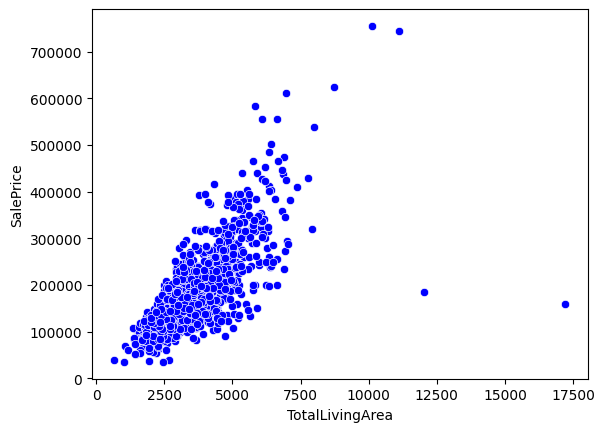

In [5]:
pd_handler = load_csv("/kaggle/input/home-data-for-ml-course/train.csv", index_col='Id')
X = pd_handler.get_X()
# Areas 
sf_columns = X.filter(like='SF').columns.tolist()
area_columns = X.filter(like='Area').columns.tolist()
area_columns.extend(sf_columns) 
X['TotalLivingArea'] = X['1stFlrSF'] + X['2ndFlrSF'] + X['OpenPorchSF']+ X['GrLivArea'] + X['BsmtFinSF1']
#X[area_columns]
sns.scatterplot(data=X, x='TotalLivingArea',y='SalePrice', color='b')